## Lab1 Machine Learning Balumatkina DA-01

#### initializyng all functions + libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
toler = 0.000001
learn_rate = 0.007

def scan_data(file):
    return np.genfromtxt(file, delimiter=",", skip_header=1)

def build_plot(data, plot_color):
    x_data, y_data = list(data[:, 1]), list(data[:, 2])
    plt.plot(x_data, y_data, plot_color)
    plt.show()

In [25]:
def mse_loss_function(database_row, predicted_row):
    result = sum((predicted_row[i] - database_row[i]) ** 2 for i in range(len(predicted_row)))
    return result / len(predicted_row)


def linear_regression(b0, b1, x):
    return b0 + np.multiply(b1, x)


def train(rows):
    epoch_numb = 0
    delta = 100

    b0 = np.random.randn(1)
    b1 = np.random.randn(1)

    x_column = rows[:, 1]
    y_column =  rows[:, 2]

    y_predict = [linear_regression(b0, b1, x) for x in x_column]
    loss = mse_loss_function(y_column, y_predict)
   
    while toler < delta:
        y_predict = [linear_regression(b0, b1, x) for x in x_column]
        y_difference = [(expected - predicted) for (expected, predicted) in zip(y_column, y_predict)]

        b0_derivative = - (2 / len(y_difference)) * np.sum(y_difference)
        sum_value = np.dot(x_column, y_difference)
        b1_derivative = - (2 / len(y_difference)) * sum_value

        b0 = b0 - learn_rate * b0_derivative
        b1 = b1 - learn_rate * b1_derivative

        y_predict = [linear_regression(b0, b1, x) for x in x_column]
        current_loss = mse_loss_function(y_column, y_predict)
        delta = loss - current_loss
        loss = current_loss

        print(f"epoch #{epoch_numb}: beta0 = {b0[0]} | beta1 = {b1[0]} | mse loss = {current_loss[0]}")
        
        epoch_numb += 1

    return {
        "beta0": b0[0],
        "beta1": b1[0],
        "epoch amount": epoch_numb,
        "mse loss function value": loss[0]
    }

#### analyzing training database + building graph

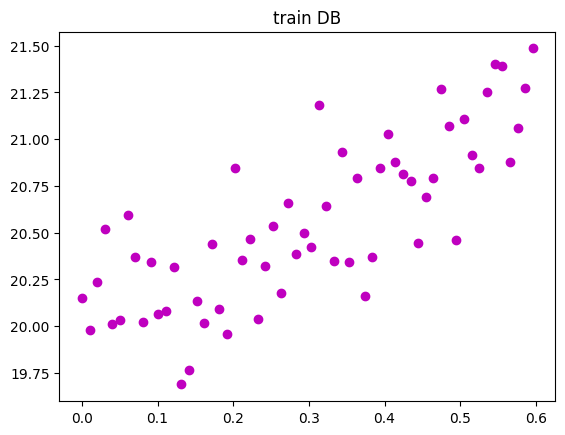

In [26]:
train_DB = scan_data("lab_1_train.csv")
plt.title("train DB")
build_plot(train_DB, 'mo')

In [27]:
train_model_work = train(train_DB)
train_model_work

epoch #0: beta0 = 1.3088809324806692 | beta1 = 0.4098894869149673 | mse loss = 365.66706093361523
epoch #1: beta0 = 1.5765405410894084 | beta1 = 0.49031877142955566 | mse loss = 354.5936565727295
epoch #2: beta0 = 1.8401173869503071 | beta1 = 0.5694970185228743 | mse loss = 343.8560368766431
epoch #3: beta0 = 2.0996738477161276 | beta1 = 0.6474433514305642 | mse loss = 333.4440193681587
epoch #4: beta0 = 2.355271347975763 | beta1 = 0.7241766012019275 | mse loss = 323.34773034809035
epoch #5: beta0 = 2.6069703738160506 | beta1 = 0.7997153111642286 | mse loss = 313.5575955317427
epoch #6: beta0 = 2.854830487161095 | beta1 = 0.874077741318785 | mse loss = 304.06433096933
epoch #7: beta0 = 3.0989103398925026 | beta1 = 0.947281872669892 | mse loss = 294.8589342417295
epoch #8: beta0 = 3.3392676877538725 | beta1 = 1.0193454114876046 | mse loss = 285.9326759232195
epoch #9: beta0 = 3.575959404042843 | beta1 = 1.0902857935053887 | mse loss = 277.2770913031051
epoch #10: beta0 = 3.8090414930939

{'beta0': 19.897482742524062,
 'beta1': 2.182462094056438,
 'epoch amount': 7449,
 'mse loss function value': 0.07430758085970447}

#### analyzing test database + building graph

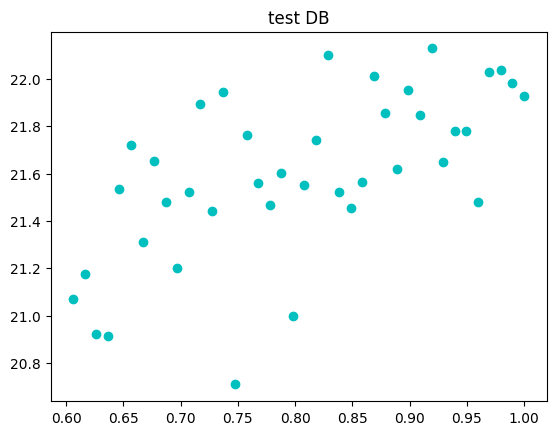

In [28]:
test_DB = scan_data("lab_1_test.csv")
plt.title("test DB")
build_plot(test_DB, 'co')

#### building total graph

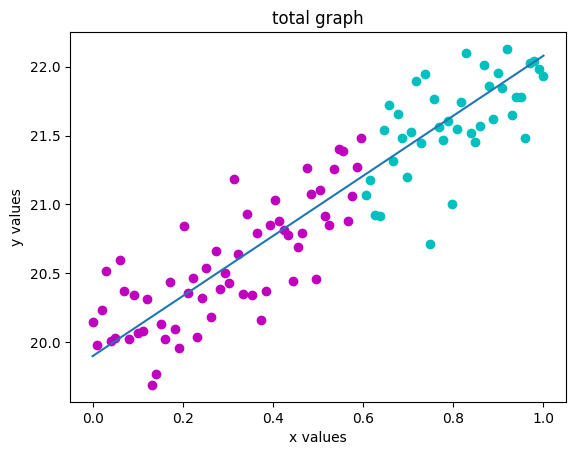

In [29]:
x_train, y_train = list(train_DB[:, 1]), list(train_DB[:, 2])
x_test, y_test = list(test_DB[:, 1]), list(test_DB[:, 2])
plt.title("total graph")
plt.xlabel('x values') 
plt.ylabel('y values') 
plt.plot(x_train, y_train, 'om',
         x_test, y_test, 'oc',
         [0, 1], [linear_regression(train_model_work["beta0"], train_model_work["beta1"], 0), linear_regression(train_model_work["beta0"], train_model_work["beta1"], 1)])
plt.show()

#### Mean Squarred Error loss value (not the best but still)

In [30]:
y_predict = [linear_regression(train_model_work["beta0"], train_model_work["beta1"], x) for x in x_test]
print(f"test mse loss value: {mse_loss_function(y_test, y_predict)}")

test mse loss value: 0.07710949046251446
